# Encoder-Decoder-CNN

# A simple synthetic data

In [90]:
import math
from matplotlib import pyplot as plt
import numpy as np
import random

def get_sin_wave(noise = 0.05, points = 1000):
    
    sin_wave = []
    c = 0.1
    for i in range(points):
        n = random.random()*noise
        sin_wave.append(c*i+10*math.sin(i*0.05+n)+3*math.sin(i*0.1))
    
    sin_wave = np.array(sin_wave)
    
    return sin_wave

In [91]:
seq_len = 20

def get_Data(sin_wave):
    X = []
    Y = []
    num_records = len(sin_wave) - seq_len

    for i in range(num_records):
        X.append(sin_wave[i:i+seq_len])
        Y.append(sin_wave[i+seq_len])

    X = np.array(X)
    X = np.expand_dims(X, axis=2)

    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=1)
    
    return X,Y

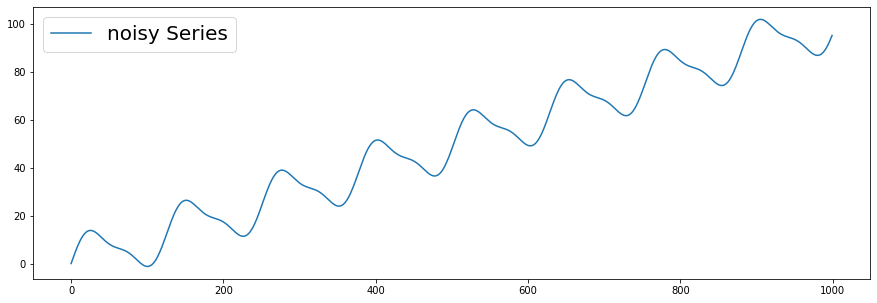

(980, 20, 1) (980, 1)


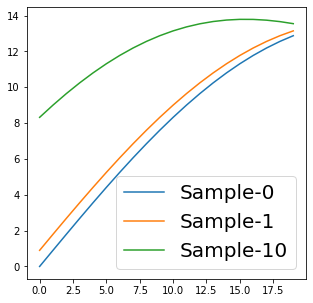

In [92]:
# Training Data

sin_wave = get_sin_wave(noise=0.0)
plt.figure(figsize=(15, 5))
plt.plot(sin_wave, label='noisy Series')
plt.legend(fontsize=20)
plt.show()

X,Y = get_Data(sin_wave)
print(X.shape, Y.shape)

plt.figure(figsize=(5, 5))
plt.plot(X[0][:,0], label='Sample-0')
plt.plot(X[1][:,0], label='Sample-1')
plt.plot(X[10][:,0], label='Sample-10')
plt.legend(fontsize=20)
plt.show()

# Encoder-decoder-CNN

In [126]:
# 1D-CNN
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.Input((X.shape[1], X.shape[2])))

model.add(tf.keras.layers.Conv1D(16, 3, activation='relu'))
model.add(tf.keras.layers.Conv1D(16, 3, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='relu'))

#Now we do decoder
model.add(tf.keras.layers.Reshape((5,4)))
model.add(tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling1D(2))
model.add(tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same'))
model.add(tf.keras.layers.UpSampling1D(2))
model.add(tf.keras.layers.Conv1D(1, 1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredError())


model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_186 (Conv1D)          (None, 18, 16)            64        
_________________________________________________________________
conv1d_187 (Conv1D)          (None, 16, 16)            784       
_________________________________________________________________
flatten_39 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 20)                5140      
_________________________________________________________________
reshape_33 (Reshape)         (None, 5, 4)              0         
_________________________________________________________________
conv1d_188 (Conv1D)          (None, 5, 16)             208       
_________________________________________________________________
up_sampling1d_39 (UpSampling (None, 10, 16)          

In [127]:
model.fit(X, X, batch_size=64, epochs=300,verbose=1)

Epoch 1/300
980/980 [==============================] - 1s 1ms/sample - loss: 2990.7510
Epoch 2/300
980/980 [==============================] - 0s 61us/sample - loss: 1136.1692
Epoch 3/300
980/980 [==============================] - 0s 61us/sample - loss: 379.1392
Epoch 4/300
980/980 [==============================] - 0s 62us/sample - loss: 211.2265
Epoch 5/300
980/980 [==============================] - 0s 64us/sample - loss: 103.2710
Epoch 6/300
980/980 [==============================] - 0s 62us/sample - loss: 41.8577
Epoch 7/300
980/980 [==============================] - 0s 61us/sample - loss: 19.8791
Epoch 8/300
980/980 [==============================] - 0s 68us/sample - loss: 13.6406
Epoch 9/300
980/980 [==============================] - 0s 67us/sample - loss: 10.0869
Epoch 10/300
980/980 [==============================] - 0s 67us/sample - loss: 8.1627
Epoch 11/300
980/980 [==============================] - 0s 69us/sample - loss: 6.7268
Epoch 12/300
980/980 [==========================

980/980 [==============================] - 0s 72us/sample - loss: 0.0519
Epoch 97/300
980/980 [==============================] - 0s 74us/sample - loss: 0.0512
Epoch 98/300
980/980 [==============================] - 0s 77us/sample - loss: 0.0578
Epoch 99/300
980/980 [==============================] - 0s 73us/sample - loss: 0.0781
Epoch 100/300
980/980 [==============================] - 0s 73us/sample - loss: 0.2558
Epoch 101/300
980/980 [==============================] - 0s 72us/sample - loss: 0.1181
Epoch 102/300
980/980 [==============================] - 0s 73us/sample - loss: 0.0774
Epoch 103/300
980/980 [==============================] - 0s 73us/sample - loss: 0.0584
Epoch 104/300
980/980 [==============================] - 0s 70us/sample - loss: 0.0551
Epoch 105/300
980/980 [==============================] - 0s 73us/sample - loss: 0.0534
Epoch 106/300
980/980 [==============================] - 0s 72us/sample - loss: 0.0507
Epoch 107/300
980/980 [==============================] - 0s 

980/980 [==============================] - 0s 64us/sample - loss: 0.0472
Epoch 191/300
980/980 [==============================] - 0s 72us/sample - loss: 0.0475
Epoch 192/300
980/980 [==============================] - 0s 67us/sample - loss: 0.0471
Epoch 193/300
980/980 [==============================] - 0s 71us/sample - loss: 0.0470
Epoch 194/300
980/980 [==============================] - 0s 68us/sample - loss: 0.0472
Epoch 195/300
980/980 [==============================] - 0s 72us/sample - loss: 0.0470
Epoch 196/300
980/980 [==============================] - 0s 72us/sample - loss: 0.0468
Epoch 197/300
980/980 [==============================] - 0s 75us/sample - loss: 0.0468
Epoch 198/300
980/980 [==============================] - 0s 74us/sample - loss: 0.0467
Epoch 199/300
980/980 [==============================] - 0s 72us/sample - loss: 0.0467
Epoch 200/300
980/980 [==============================] - 0s 73us/sample - loss: 0.0468
Epoch 201/300
980/980 [==============================] - 

980/980 [==============================] - 0s 71us/sample - loss: 0.0456
Epoch 285/300
980/980 [==============================] - 0s 73us/sample - loss: 0.0458
Epoch 286/300
980/980 [==============================] - 0s 77us/sample - loss: 0.0462
Epoch 287/300
980/980 [==============================] - 0s 77us/sample - loss: 0.0465
Epoch 288/300
980/980 [==============================] - 0s 75us/sample - loss: 0.0481
Epoch 289/300
980/980 [==============================] - 0s 74us/sample - loss: 0.0459
Epoch 290/300
980/980 [==============================] - 0s 74us/sample - loss: 0.0472
Epoch 291/300
980/980 [==============================] - 0s 74us/sample - loss: 0.0506
Epoch 292/300
980/980 [==============================] - 0s 78us/sample - loss: 0.1117
Epoch 293/300
980/980 [==============================] - 0s 76us/sample - loss: 0.1578
Epoch 294/300
980/980 [==============================] - 0s 71us/sample - loss: 0.0490
Epoch 295/300
980/980 [==============================] - 

In [128]:
X_pred = model.predict(X)

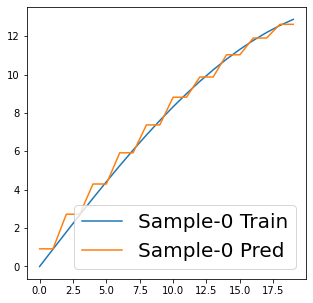

In [129]:
plt.figure(figsize=(5, 5))
plt.plot(X[0][:,0], label='Sample-0 Train')
plt.plot(X_pred[0][:,0], label='Sample-0 Pred')

plt.legend(fontsize=20)
plt.show()

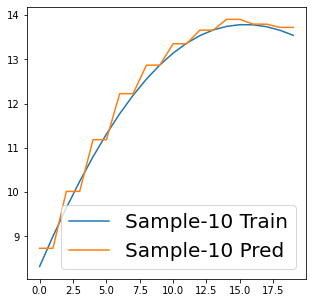

In [130]:
plt.figure(figsize=(5, 5))
plt.plot(X[10][:,0], label='Sample-10 Train')
plt.plot(X_pred[10][:,0], label='Sample-10 Pred')

plt.legend(fontsize=20)
plt.show()

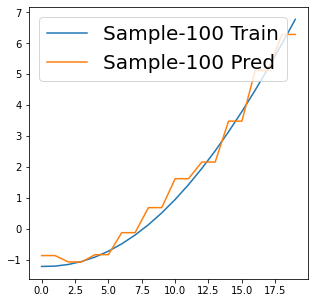

In [131]:
plt.figure(figsize=(5, 5))
plt.plot(X[100][:,0], label='Sample-100 Train')
plt.plot(X_pred[100][:,0], label='Sample-100 Pred')

plt.legend(fontsize=20)
plt.show()